In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("results_df.csv").drop("Unnamed: 0", axis=1).reset_index(drop=True)

In [3]:
# getting for the following combinations
# weak 1 strong 1.4
# weak 1.4 strong 2.8

In [4]:
# with param sizes on Y axis and training-steps on X axis
# show the weak, strong and w2s accuracy in different colours each

In [5]:
# Two questions
# 1. How would word-to-sentence (w2s) generalization evolve with an increase in pretraining?
# 2. How much pretraining would a much smaller model require to achieve w2s generalization comparable to a larger model in the context of a much larger model?
# - What is the pretraining gap required for 1b model to supervise 2.8b model at 1.4b model level

In [6]:
df

,weak_acc,strong_acc,transfer_acc_xent,transfer_acc_logconf,weak_params,weak_steps,strong_params,strong_steps
0,0.635,0.635,0.635,0.560,1.4,1000.0,1.40,1000.0
1,0.635,0.635,0.635,0.575,1.4,1000.0,1.40,121000.0
2,0.635,0.605,0.635,0.545,1.4,1000.0,1.40,31000.0
3,0.635,0.635,0.635,0.495,1.4,1000.0,1.40,61000.0
4,0.635,0.570,0.635,0.455,1.4,1000.0,1.40,91000.0
...,...,...,...,...,...,...,...,...
369,0.590,0.565,0.600,0.605,2.8,91000.0,0.41,1000.0
370,0.590,0.580,0.610,0.500,2.8,91000.0,0.41,121000.0
371,0.590,0.660,0.600,0.585,2.8,91000.0,0.41,31000.0
372,0.590,0.735,0.610,0.590,2.8,91000.0,0.41,61000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weak_acc              374 non-null    float64
 1   strong_acc            374 non-null    float64
 2   transfer_acc_xent     374 non-null    float64
 3   transfer_acc_logconf  374 non-null    float64
 4   weak_params           374 non-null    float64
 5   weak_steps            374 non-null    float64
 6   strong_params         374 non-null    float64
 7   strong_steps          374 non-null    float64
dtypes: float64(8)
memory usage: 23.5 KB


/tmp/ipykernel_14043/3764065569.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(params_order))


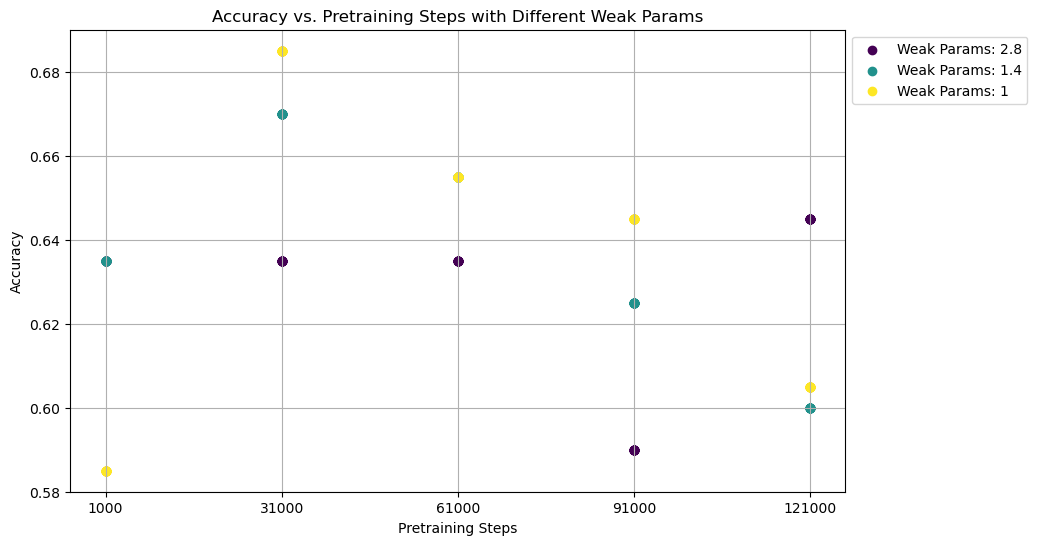

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Define the order of 'weak_params' in reverse
params_order = [2.8, 1.4, 1]

# Sort the DataFrame based on the 'weak_params' column
df_sorted = df.sort_values(by='weak_params')

# Create a colormap based on the number of unique 'weak_params'
colormap = plt.cm.get_cmap('viridis', len(params_order))

# Plotting
plt.figure(figsize=(10, 6))

for i, param_value in enumerate(params_order):
    group = df_sorted[df_sorted['weak_params'] == param_value]
    plt.scatter(group['weak_steps'], group['weak_acc'], color=colormap(i), label=f'Weak Params: {param_value}')

plt.xlabel('Pretraining Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Pretraining Steps with Different Weak Params')
plt.xticks(df_sorted['weak_steps'].unique())  # Set x-axis ticks to unique values
plt.grid(True)

# Place legend outside the plot on the left side
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


/tmp/ipykernel_14043/299993131.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(params_order))


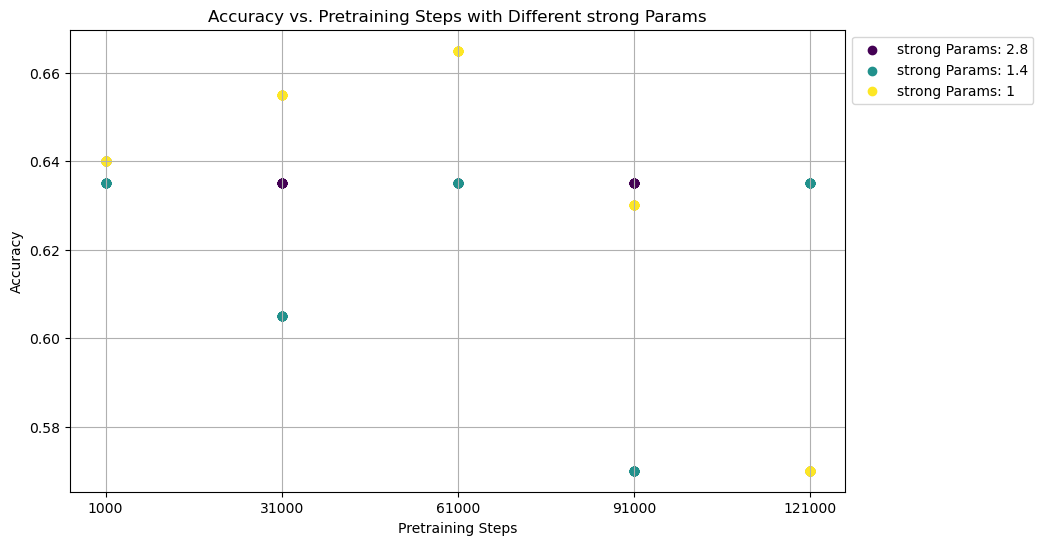

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Define the order of 'strong_params' in reverse
params_order = [2.8, 1.4, 1]

# Sort the DataFrame based on the 'strong_params' column
df_sorted = df.sort_values(by='strong_params')

# Create a colormap based on the number of unique 'strong_params'
colormap = plt.cm.get_cmap('viridis', len(params_order))

# Plotting
plt.figure(figsize=(10, 6))

for i, param_value in enumerate(params_order):
    group = df_sorted[df_sorted['strong_params'] == param_value]
    plt.scatter(group['strong_steps'], group['strong_acc'], color=colormap(i), label=f'strong Params: {param_value}')

plt.xlabel('Pretraining Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Pretraining Steps with Different strong Params')
plt.xticks(df_sorted['strong_steps'].unique())  # Set x-axis ticks to unique values
plt.grid(True)

# Place legend outside the plot on the left side
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


/tmp/ipykernel_14043/3391797336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["transfer_acc_xent"])


<Axes: xlabel='transfer_acc_xent', ylabel='Density'>

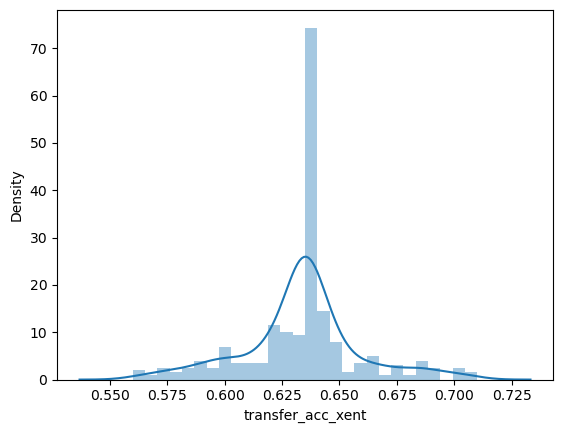

In [12]:
sns.distplot(df["transfer_acc_xent"])

/tmp/ipykernel_14043/1557059674.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["transfer_acc_logconf"])


<Axes: xlabel='transfer_acc_logconf', ylabel='Density'>

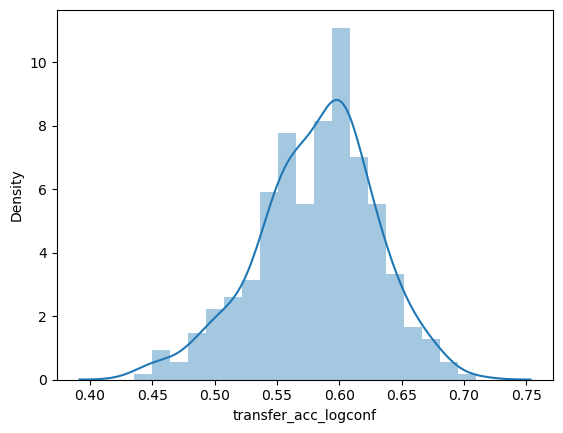

In [13]:
sns.distplot(df["transfer_acc_logconf"])

/tmp/ipykernel_14043/2977547731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["weak_acc"])


<Axes: xlabel='weak_acc', ylabel='Density'>

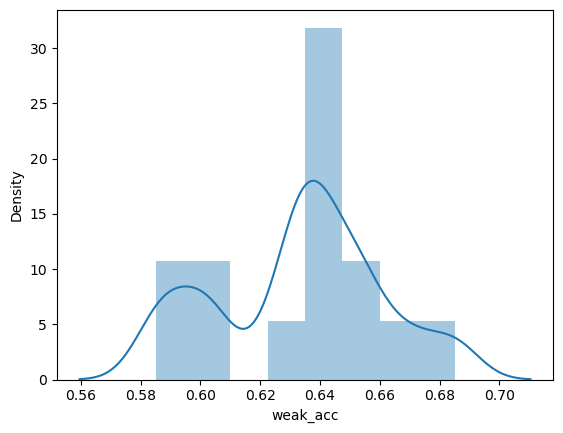

In [14]:
sns.distplot(df["weak_acc"])

/tmp/ipykernel_14043/4084218448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["strong_acc"])


<Axes: xlabel='strong_acc', ylabel='Density'>

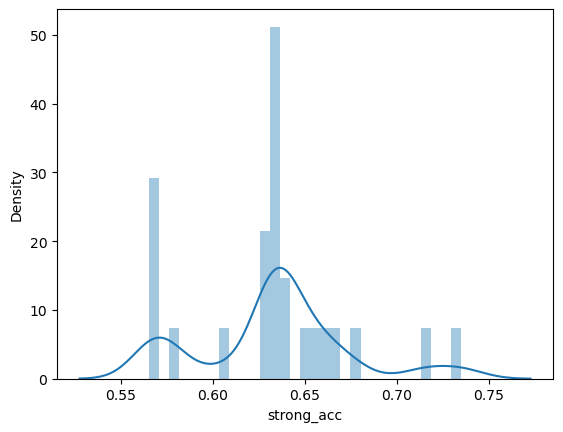

In [15]:
sns.distplot(df["strong_acc"])

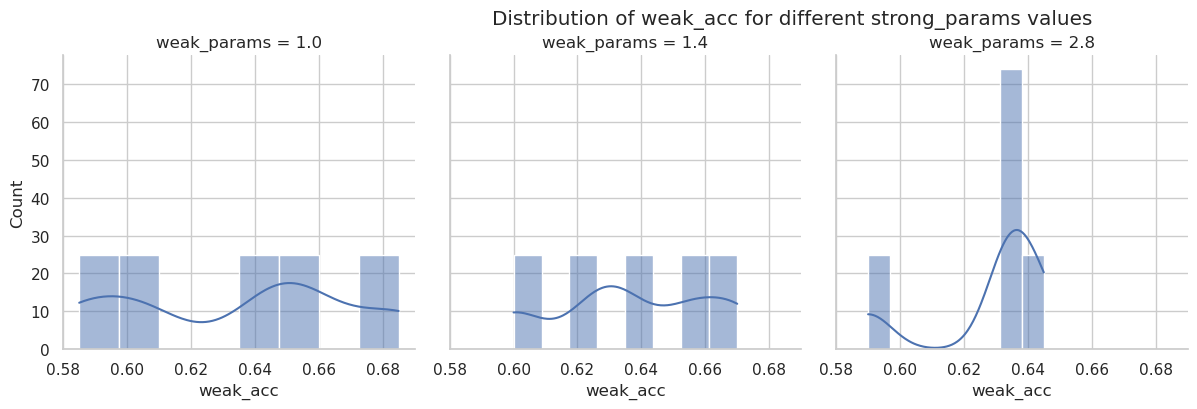

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "weak_acc" is the column you want to plot
sns.set(style="whitegrid")

# Create a FacetGrid with strong_params as the column variable
g = sns.FacetGrid(df, col="weak_params", col_wrap=4, height=4)

# Map the distribution plot onto the FacetGrid
g.map(sns.histplot, "weak_acc", kde=True)

plt.suptitle("Distribution of weak_acc for different strong_params values", y=1.02)
plt.show()


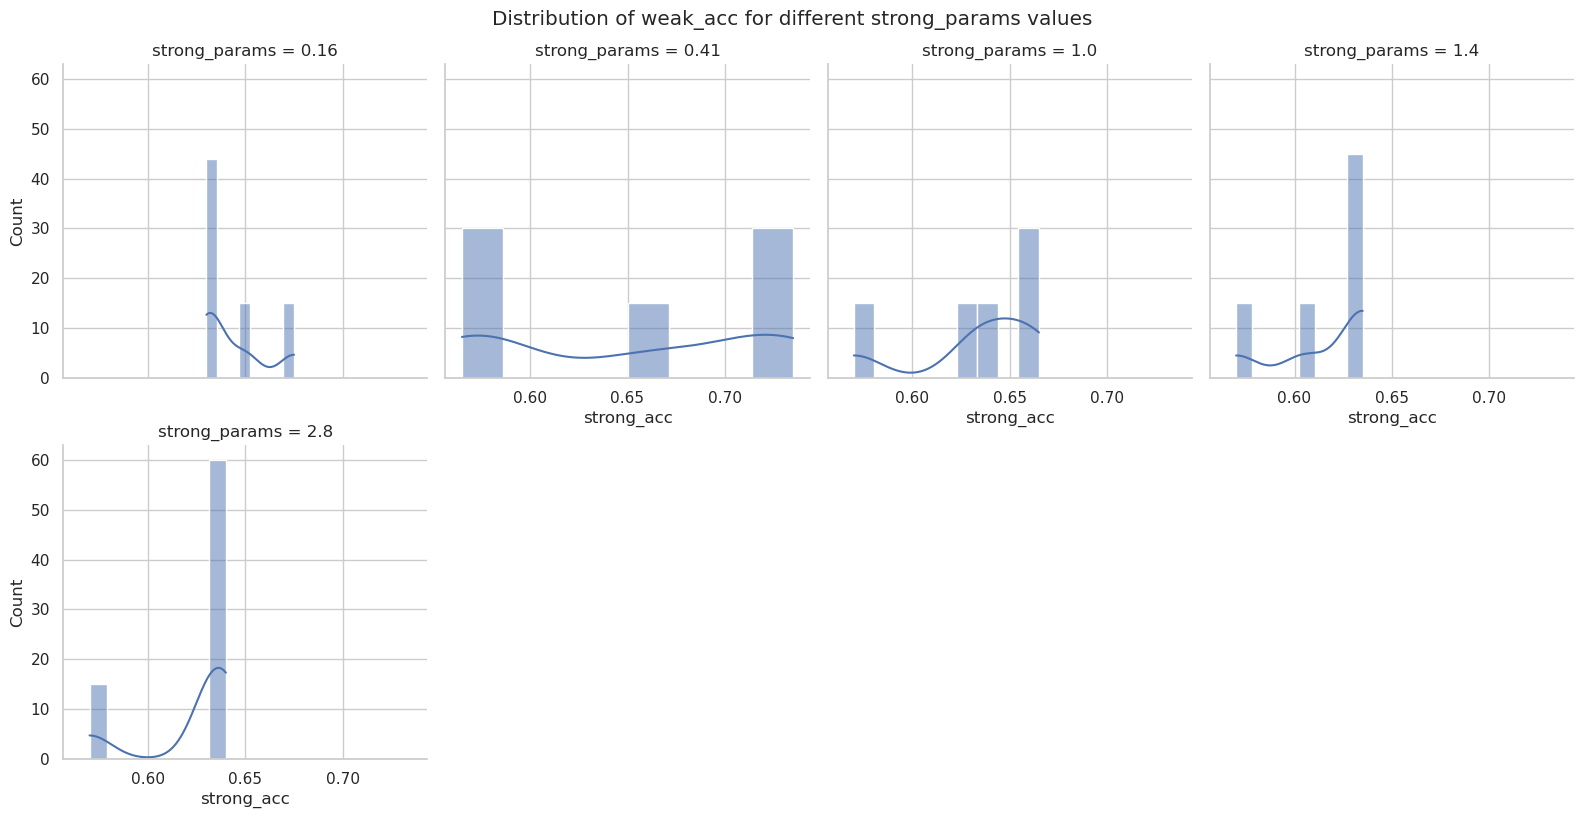

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "weak_acc" is the column you want to plot
sns.set(style="whitegrid")

# Create a FacetGrid with strong_params as the column variable
g = sns.FacetGrid(df, col="strong_params", col_wrap=4, height=4)

# Map the distribution plot onto the FacetGrid
g.map(sns.histplot, "strong_acc", kde=True)

plt.suptitle("Distribution of weak_acc for different strong_params values", y=1.02)
plt.show()
